<a href="https://colab.research.google.com/github/Suman-Adhikary/Big-Mart-Sale-Prediction/blob/main/Bigmart_Sale_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries.

In [922]:
!pip install feature_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from feature_engine.transformation import BoxCoxTransformer, LogTransformer
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
sns.set_style('darkgrid')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Handling.

In [923]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [924]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [925]:
train_data.shape

(8523, 12)

In [926]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [927]:
test_data.shape

(5681, 11)

## Combine train, test data and separate target variable.

In [928]:
X = pd.concat([train_data.iloc[:, :-1], test_data], axis=0)
y = train_data.iloc[:, -1]

In [929]:
X.shape, y.shape

((14204, 11), (8523,))

In [930]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1


In [931]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

## Data information.

In [932]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 1.3+ MB


In [933]:
X.shape

(14204, 11)

In [934]:
col = [col for col in X.columns]
Uni = [X[col].nunique() for col in X.columns]
Missing = [X[col].isna().sum() for col in X.columns]
Data_type = [X[col].dtypes for col in X.columns]
myTable = PrettyTable()
myTable.add_column('Column', col)
myTable.add_column('Unique value', Uni)
myTable.add_column('Missing Value', Missing)
myTable.add_column('Data Type', Data_type)
print(myTable)

+---------------------------+--------------+---------------+-----------+
|           Column          | Unique value | Missing Value | Data Type |
+---------------------------+--------------+---------------+-----------+
|      Item_Identifier      |     1559     |       0       |   object  |
|        Item_Weight        |     415      |      2439     |  float64  |
|      Item_Fat_Content     |      5       |       0       |   object  |
|      Item_Visibility      |    13006     |       0       |  float64  |
|         Item_Type         |      16      |       0       |   object  |
|          Item_MRP         |     8052     |       0       |  float64  |
|     Outlet_Identifier     |      10      |       0       |   object  |
| Outlet_Establishment_Year |      9       |       0       |   int64   |
|        Outlet_Size        |      3       |      4016     |   object  |
|    Outlet_Location_Type   |      3       |       0       |   object  |
|        Outlet_Type        |      4       |       

In [935]:
X.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,11765.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681
std,4.652502,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,1985.000000
25%,8.710000,0.027036,94.012000,1987.000000
50%,12.600000,0.054021,142.247000,1999.000000
75%,16.750000,0.094037,185.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


### Distribution of target variable.

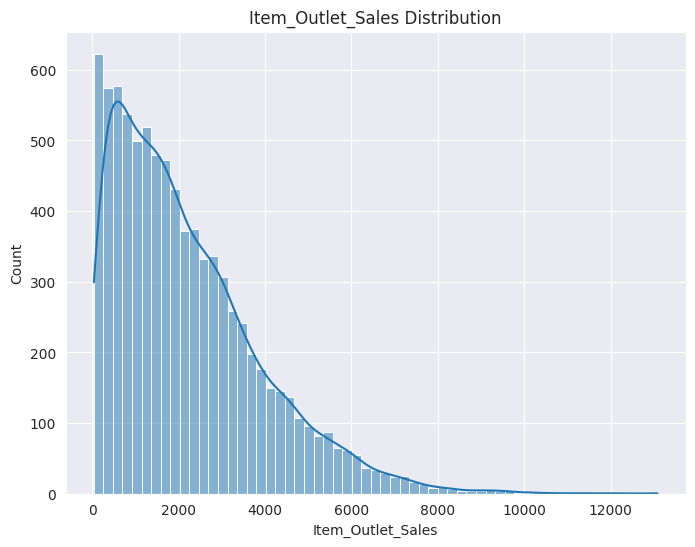

In [936]:
plt.figure(figsize=(8,6))
sns.histplot(y, kde=True)
title = plt.title("Item_Outlet_Sales Distribution")

In [937]:
print('Skewness of y : ', y.skew())
print('Kurtosis of y : ', y.kurt())

Skewness of y :  1.1775306028542796
Kurtosis of y :  1.6158766814287264


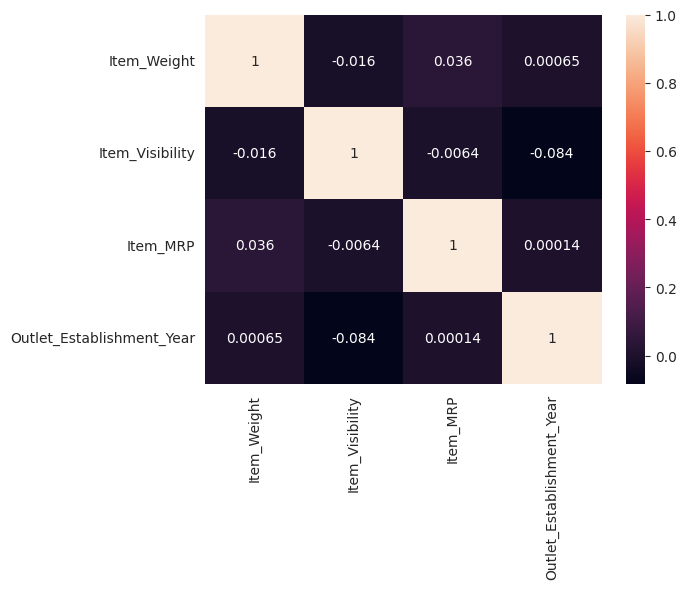

In [938]:
matrix = X.corr()
sns.heatmap(matrix, annot=True)
plt.show()

# Univariate analysis.

## Categorical variables.

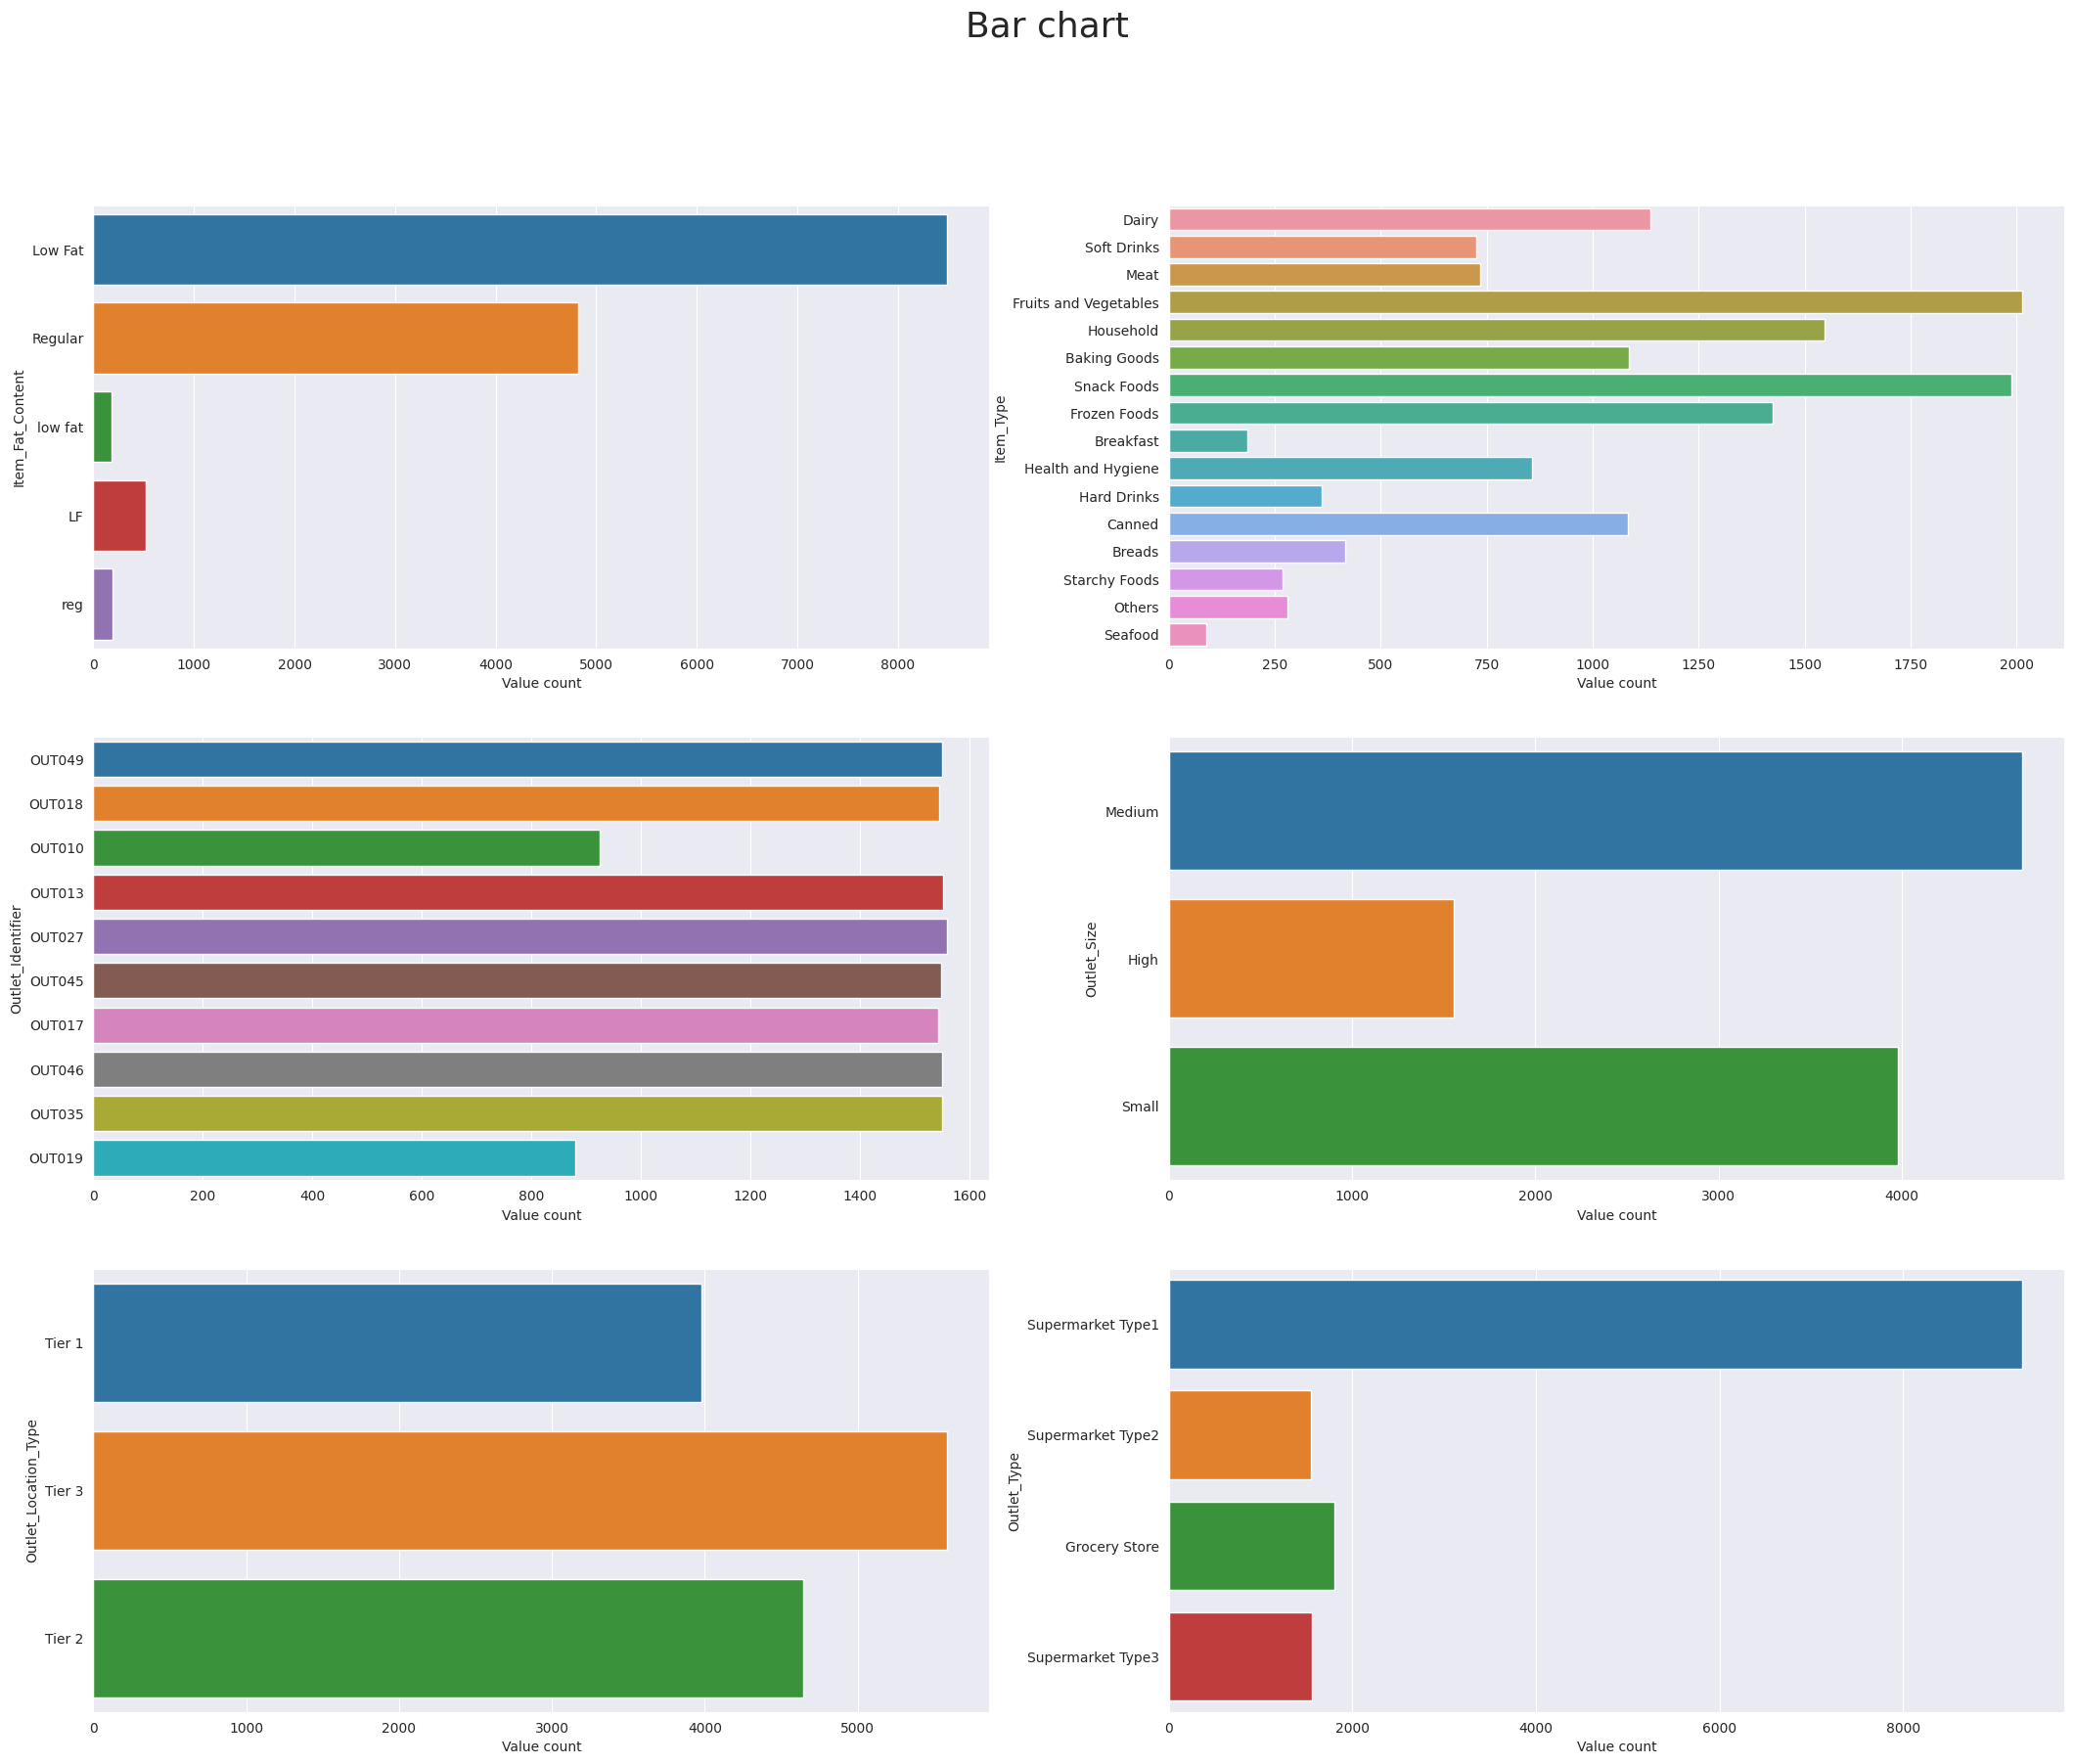

In [939]:
col = [col for col in X.columns if X[col].dtypes == 'object']
col = col[1:]

fig, axs = plt.subplots(3, 2, figsize=(26, 20), squeeze=False)

Axis = []
for j in range(3):
    for k in range(2):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.countplot(data = X, y = X[col[i]], ax=Axis[i])
    Axis[i].set_xlabel('Value count')

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)

fig.suptitle("Bar chart", fontsize=26)
plt.show()

## Numerical variables.

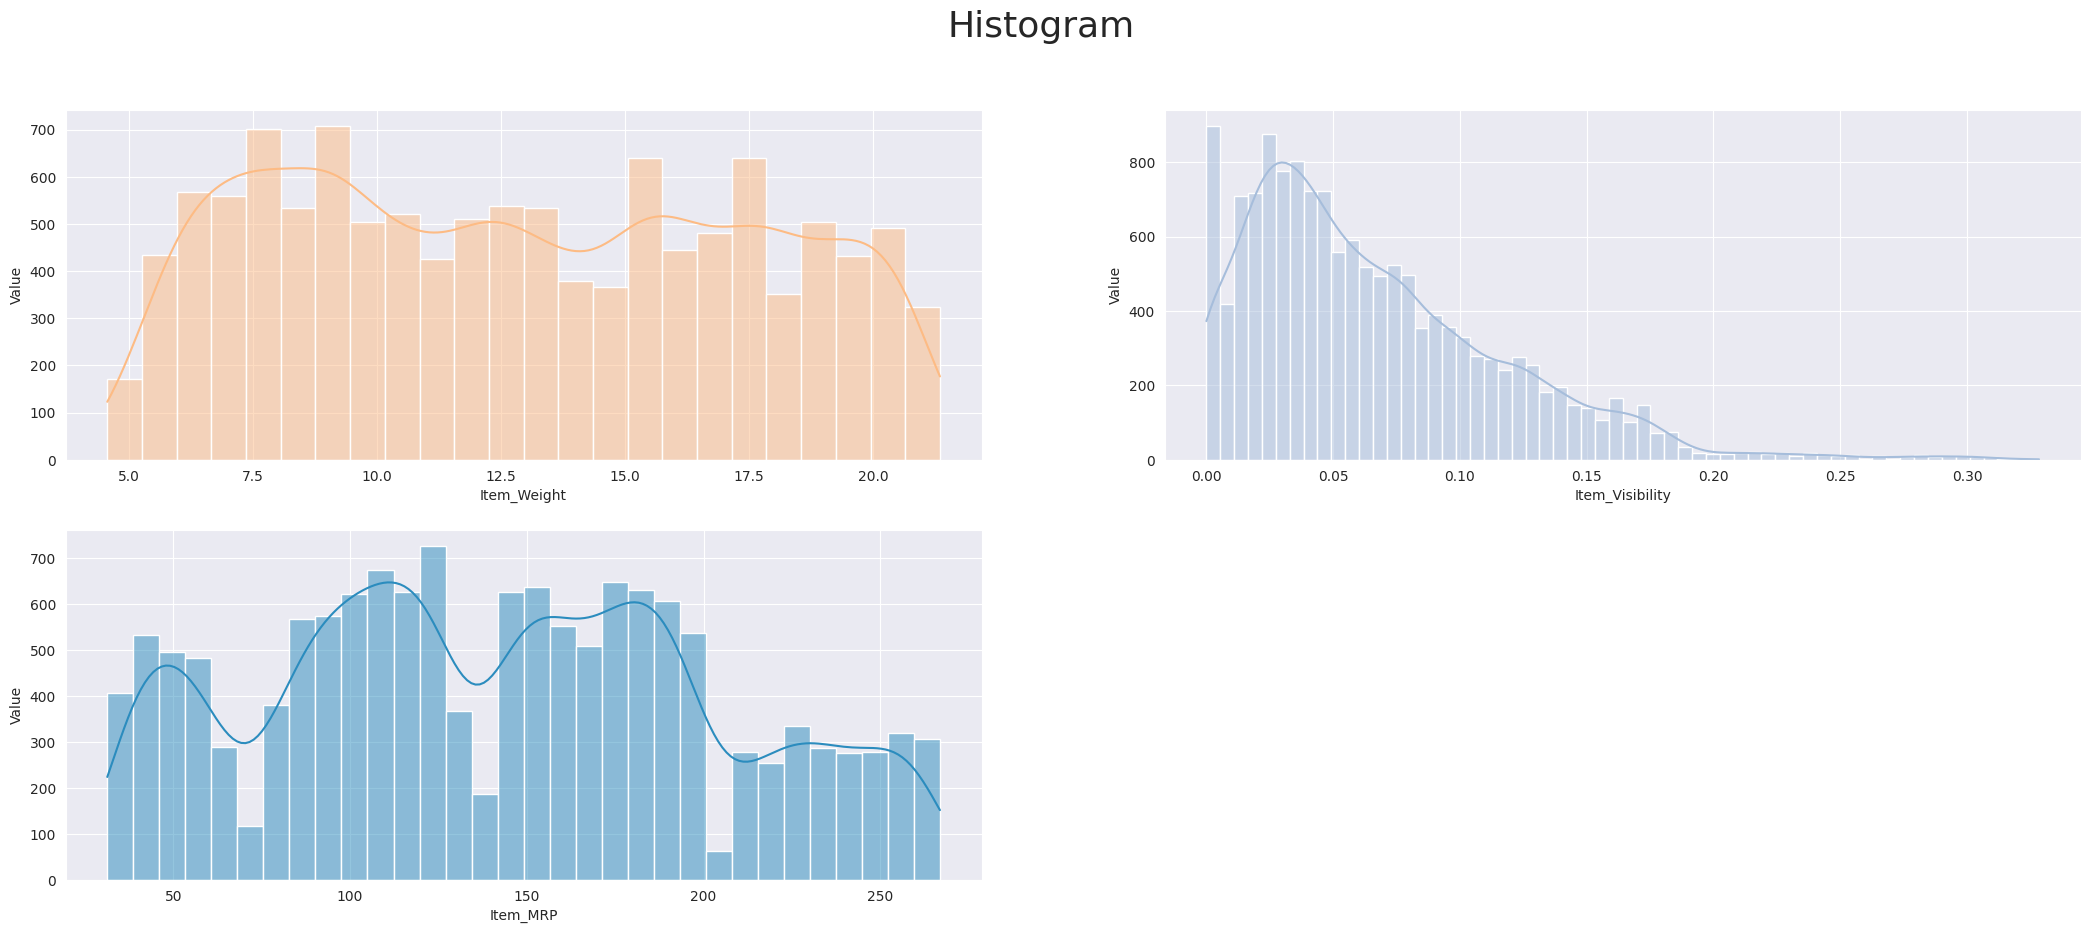

In [940]:
col = [col for col in X.columns if X[col].dtypes == 'float64' or X[col].dtypes == 'int64']
Color = ['#fdbb84', '#a6bddb', '#2b8cbe']
col = col[0:3]
fig, axs = plt.subplots(2, 2, figsize=(26, 10), squeeze=False)

Axis = []
for j in range(2):
    for k in range(2):
        Axis.append(axs[j, k])

for i in range(len(col)):
    sns.histplot(X[col[i]], kde=True, ax=Axis[i], color = Color[i])
    Axis[i].set_ylabel('Value')

for ax in axs.flat:
        if not bool(ax.has_data()):
            fig.delaxes(ax)

fig.suptitle("Histogram", fontsize=26)
plt.show()

# Bivariate Analysis.

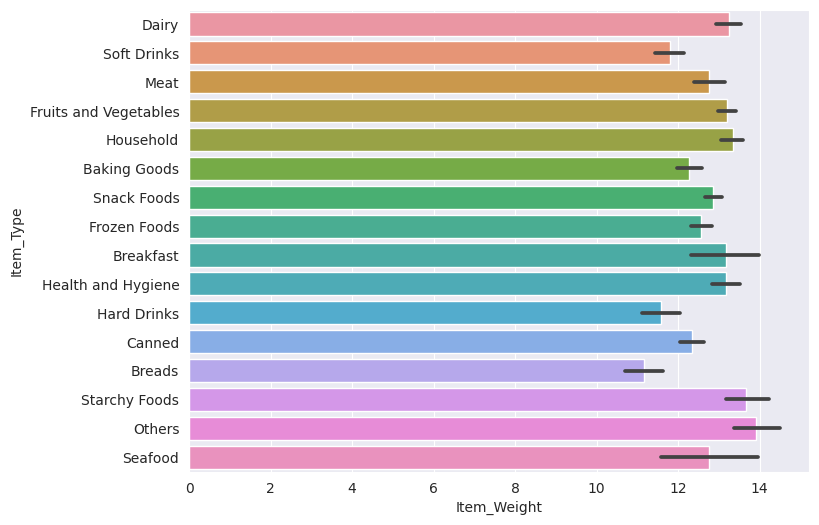

In [941]:
# Item type vs item weight
plt.figure(figsize=(8,6))
sns.barplot(data = X, y = 'Item_Type', x = 'Item_Weight')
plt.show()

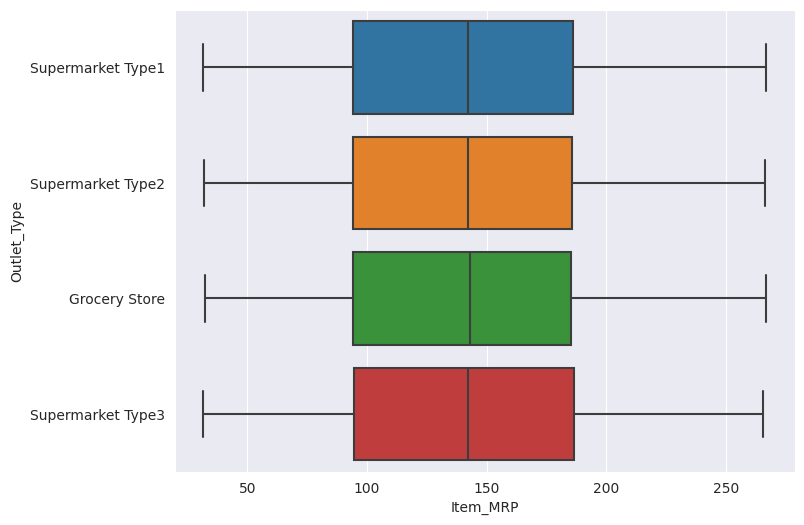

In [942]:
# Outlet type vs item MRP
plt.figure(figsize=(8,6))
sns.boxplot(data = X, y = 'Outlet_Type', x = 'Item_MRP')
plt.show()

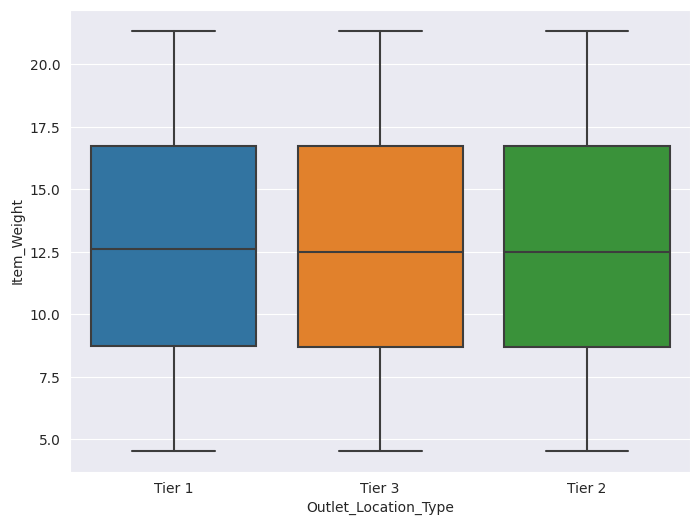

In [943]:
# Outlet Location type vs Item Weight.
plt.figure(figsize=(8,6))
sns.boxplot(data = X, y = 'Item_Weight', x = 'Outlet_Location_Type')
plt.show()

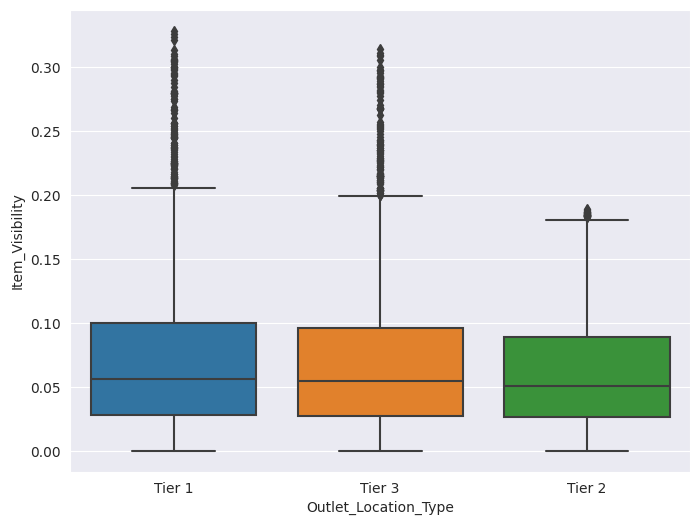

In [944]:
# Item visibility VS Outlet size.
plt.figure(figsize=(8,6))
sns.boxplot(y='Item_Visibility',x='Outlet_Location_Type',data=X)
plt.show()

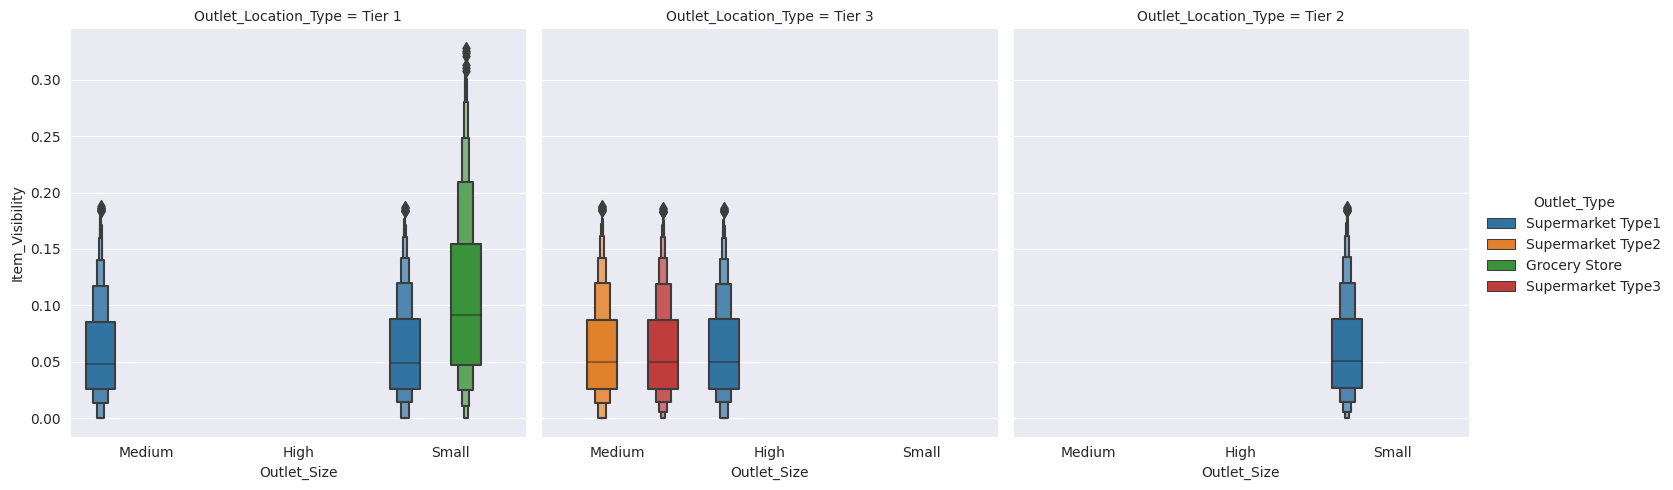

In [945]:
sns.catplot(data=X, x='Outlet_Size',y='Item_Visibility',kind='boxen', col='Outlet_Location_Type', hue='Outlet_Type')
plt.show()

## Feature engineering.

In [946]:
cat_col = [col for col in X.columns if X[col].dtypes == 'object']
cat_col = cat_col[1:]
for i in cat_col:
  print(X[i].value_counts())
  print()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Supermarket Type1

In [947]:
X.loc[(X['Item_Fat_Content'] == "LF") | (X['Item_Fat_Content']  == "low fat"), 'Item_Fat_Content'] = 'Low Fat'
X.loc[X['Item_Fat_Content'] == "reg", 'Item_Fat_Content'] = 'Regular'

In [948]:
X['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [949]:
CrossTable1=pd.crosstab(X['Outlet_Size'],X['Outlet_Type'])
CrossTable1

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,1553,0,0
Medium,0,1550,1546,1559
Small,880,3100,0,0


In [950]:
CrossTable2=pd.crosstab(X['Outlet_Size'],X['Outlet_Location_Type'])
CrossTable2

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,1553
Medium,1550,0,3105
Small,2430,1550,0


In [951]:
X['Item_Visibility'] = np.where(X['Item_Visibility'] == 0, 'NaN', X['Item_Visibility']).astype(float)

In [952]:
X['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

# Missing Data.

In [953]:
Miss_col = [col for col in X.columns if X[col].isna().sum() > 0]
No_of_miss = [X[col].isna().sum() for col in X.columns if X[col].isna().sum() > 0]
Per_of_data = [round((X[col].isna().sum() / len(X[col]) * 100), 2) for col in X.columns if X[col].isna().sum() > 0]
Miss_dtype = [X[col].dtypes for col in X.columns if X[col].isna().sum() > 0]
Table = PrettyTable()
Table.add_column('Column', Miss_col)
Table.add_column('No of Missing', No_of_miss)
Table.add_column('% of missing data', Per_of_data)
Table.add_column('Data type', Miss_dtype)
print(Table)

+-----------------+---------------+-------------------+-----------+
|      Column     | No of Missing | % of missing data | Data type |
+-----------------+---------------+-------------------+-----------+
|   Item_Weight   |      2439     |       17.17       |  float64  |
| Item_Visibility |      879      |        6.19       |  float64  |
|   Outlet_Size   |      4016     |       28.27       |   object  |
+-----------------+---------------+-------------------+-----------+


## Numerical missing data.

In [954]:
Item_Weight_mean = X.pivot_table(values='Item_Weight', index='Item_Identifier', aggfunc=np.mean)
Item_Weight_mean

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [955]:
miss_bool = X['Item_Weight'].isna()
miss_bool = list(miss_bool)

In [956]:
for i, item in enumerate(X['Item_Identifier']):
  if miss_bool[i] == True:
    if item in Item_Weight_mean:
      X['Item_Weight'][i] = Item_Weight_mean.loc[item]['Item_Weight']
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[['Item_Weight']])
X['Item_Weight'] = imputer.transform(X[['Item_Weight']])

In [957]:
X['Item_Visibility'] = X['Item_Visibility'].fillna(X.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

## Categorical missing data.

In [958]:
Outlet_Size_mode = X.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x : x.mode()[0]))
Outlet_Size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [959]:
miss_bool = X['Outlet_Size'].isna()
X.loc[miss_bool, 'Outlet_Size'] = X.loc[miss_bool, 'Outlet_Type'].apply(lambda x : Outlet_Size_mode[x])

In [960]:
# Gro_store={'Grocery Store':'Small'}
# s=X.Outlet_Type.map(Gro_store)
# X.Outlet_Size=X.Outlet_Size.combine_first(s)

In [961]:
# Tier_2={'Tier 2':'Small'}
# s=X.Outlet_Location_Type.map(Tier_2)
# X.Outlet_Size=X.Outlet_Size.combine_first(s)

In [962]:
X.isna().sum().sum()

0

# Creating new variable.

In [963]:
X['New_Item_Type'] = X['Item_Identifier'].apply(lambda x : x[:2])
X['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 14204, dtype: object

In [964]:
X['New_Item_Type'].value_counts()

FD    10201
NC     2686
DR     1317
Name: New_Item_Type, dtype: int64

In [965]:
X['New_Item_Type'] = X['New_Item_Type'].map({'FD' : 'Food' , 'NC' : 'Non-Consumable', 'DR' : 'Drink'})
X['New_Item_Type'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: New_Item_Type, dtype: int64

In [966]:
X.loc[X['New_Item_Type'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'

In [967]:
X['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

# Year column.

In [968]:
X['Outlet_Year'] = 2013 - X['Outlet_Establishment_Year']

In [969]:
X.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_Type,Outlet_Year
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,Drink,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food,14
3,FDX07,19.20,Regular,0.022930,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,Food,15
4,NCD19,8.93,Non-Edible,0.014670,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,Non-Consumable,26


# Normality check.

In [970]:
def diagnostic_plots(df, variable):
  plt.figure(figsize=(16,5))
  plt.subplot(1, 2, 1)
  df[variable].hist(bins=30)
  plt.title(f"Histogram of {variable}")
  plt.subplot(1, 2, 2)
  stats.probplot(df[variable], dist="norm", plot=plt)
  plt.title(f"Q-Q plot of {variable}")
  plt.show()

In [971]:
y = pd.DataFrame(y, columns=['Item_Outlet_Sales'])

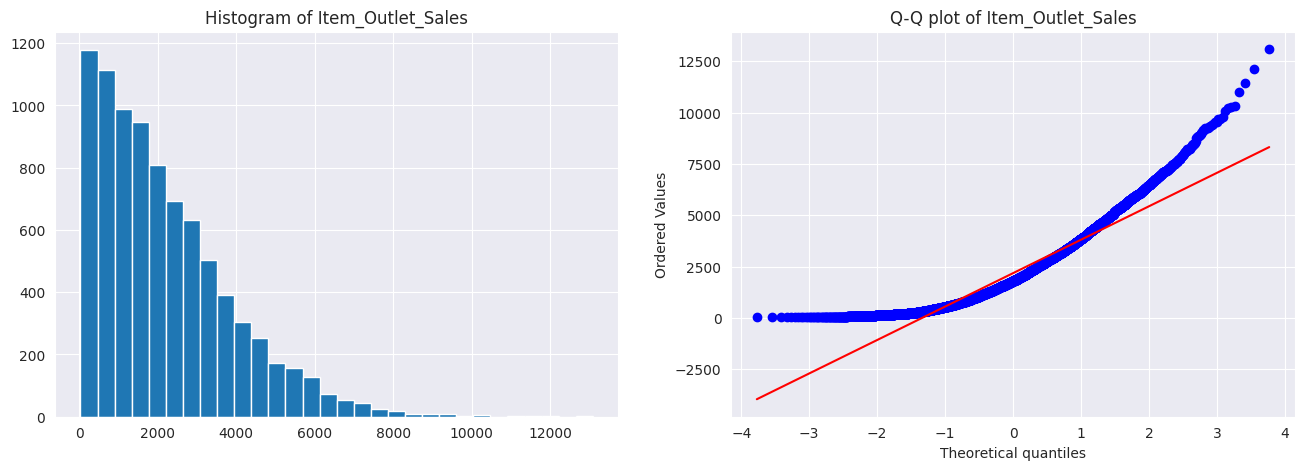

In [972]:
diagnostic_plots(y, 'Item_Outlet_Sales')

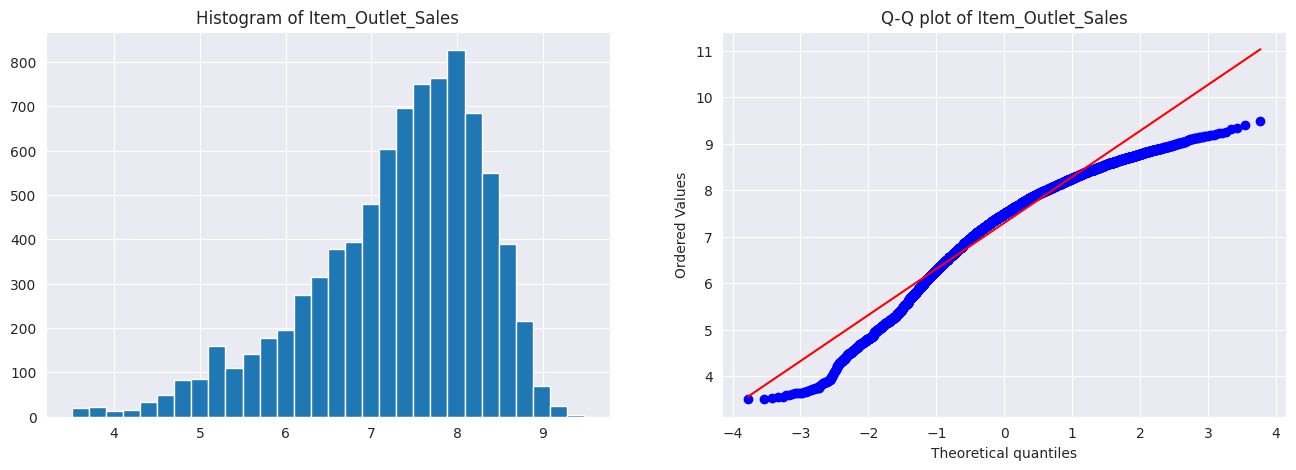

In [973]:
lt = LogTransformer()
lt.fit(y)
y = lt.transform(y)
diagnostic_plots(y, 'Item_Outlet_Sales')

In [974]:
y.describe()

,Item_Outlet_Sales
count,8523.000000
mean,7.296540
std,1.017108
min,3.505257
25%,6.726530
50%,7.492388
75%,8.039575
max,9.479372


# Encoding.

## Label encoding.

In [975]:
X = X.drop(['Item_Identifier'], axis = 1)

In [976]:
le = LabelEncoder()
X['Outlet'] = le.fit_transform(X['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type' , 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type']
for i in cat_col:
  X[i] = le.fit_transform(X[i])

In [977]:
X = pd.get_dummies(X, columns = ['Item_Fat_Content' , 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
X = X.drop(columns = ['Outlet_Identifier', 'Outlet_Establishment_Year'])

In [978]:
X.head()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Year,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,New_Item_Type_0,New_Item_Type_1,New_Item_Type_2
0,9.30,0.016047,4,249.8092,14,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,14,48.2692,4,3,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,10,141.6180,14,9,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.022930,6,182.0950,15,0,0,0,1,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.014670,9,53.8614,26,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1


# Splitting dataset.

In [979]:
train_X = X.iloc[ : len(y), :]
test_X = X.iloc[len(y) : , :]

In [980]:
X_train, X_test, y_train, y_test = train_test_split(train_X, y, test_size = 0.2, random_state = 42)

# Model building and evalution.

## Linear Regression.

In [981]:
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

LinearRegression()

In [982]:
y_pred = lr_regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Item_Outlet_Sales'])
y_pred = lt.inverse_transform(y_pred)
y_test_ = lt.inverse_transform(y_test)

In [983]:
print('r2 score : ', r2_score(y_test_, y_pred))
print('rmse : ', np.sqrt(mean_squared_error(y_test_, y_pred)))

r2 score :  0.5680212721419392
rmse :  1083.5613742346948


In [984]:
x = sm.add_constant(X_train)
results = sm.OLS(y_train,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     1081.
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:47:36   Log-Likelihood:                -5458.2
No. Observations:                6818   AIC:                         1.095e+04
Df Residuals:                    6801   BIC:                         1.107e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.9892      0.234     12.792      0.000       2.531       3.447
Item_Weight               -0.0021      0.002     -1.366      0.172      -0.005       0.001
Item_Visibility           -0.0853      0.137     -0.624      0.533      -0.353       0.183
Item_Type                  0.0006      0.002      0.335      0.737      -0.003       0.004
Item_MRP                   0.0083      0.000     78.960      0.000       0.008       0.008
Outlet_Year               -0.0736      0.026     -2.873      0.004      -0.124      -0.023
Outlet                     0.0636      0.024      2.612      0.009       0.016       0.111
Item_Fat_Content_0         0.9869      0.078     12.606      0.000       0.833       1.140
Item_Fat_Content_1         1.0027      0.078     12.828      0.000       0.849       1.156
Item_Fat_Content_2         0.9996      0.078     12.756      0.000       0.846       1.153
Outlet_Size_0              2.3267      0.544      4.275      0.000       1.260       3.394
Outlet_Size_1              0.2526      0.194      1.303      0.193      -0.127       0.633
Outlet_Size_2              0.4100      0.119      3.440      0.001       0.176       0.644
Outlet_Location_Type_0     1.3419      0.197      6.802      0.000       0.955       1.729
Outlet_Location_Type_1     1.0241      0.082     12.429      0.000       0.863       1.186
Outlet_Location_Type_2     0.6233      0.048     12.866      0.000       0.528       0.718
Outlet_Type_0             -0.4987      0.158     -3.147      0.002      -0.809      -0.188
Outlet_Type_1              0.2745      0.248      1.107      0.268      -0.212       0.761
Outlet_Type_2              0.4378      0.125      3.510      0.000       0.193       0.682
Outlet_Type_3              2.7756      0.446      6.218      0.000       1.901       3.651
New_Item_Type_0            0.9824      0.079     12.367      0.000       0.827       1.138
New_Item_Type_1            1.0042      0.078     12.810      0.000       0.850       1.158
New_Item_Type_2            1.0027      0.078     12.828      0.000       0.849       1.156
==============================================================================
Omnibus:                      663.994   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              931.755
Skew:                          -0.775   Prob(JB):                    4.70e-203
Kurtosis:                       3.937   Cond. No.                     3.50e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.36e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is sing

## Random Forest Regression.

In [985]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

<ipython-input-985-2a968e16886f>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


RandomForestRegressor()

In [986]:
y_pred = rf.predict(X_test)
y_pred = rf.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Item_Outlet_Sales'])
y_pred = lt.inverse_transform(y_pred)
y_test_ = lt.inverse_transform(y_test)

In [987]:
print('r2 score : ', r2_score(y_test_, y_pred))
print('rmse : ', np.sqrt(mean_squared_error(y_test_, y_pred)))

r2 score :  0.538167722932693
rmse :  1120.3777509690117


## XGBoost regressor.

In [988]:
xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [989]:
y_pred = xg.predict(X_test)
y_pred = xg.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Item_Outlet_Sales'])
y_pred = lt.inverse_transform(y_pred)
y_test_ = lt.inverse_transform(y_test)

In [990]:
print('r2 score : ', r2_score(y_test_, y_pred))
print('rmse : ', np.sqrt(mean_squared_error(y_test_, y_pred)))

r2 score :  0.5466605689448705
rmse :  1110.02837964842


## Decision Tree Regressor.

In [991]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [992]:
y_pred = dtr.predict(X_test)
y_pred = dtr.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Item_Outlet_Sales'])
y_pred = lt.inverse_transform(y_pred)
y_test_ = lt.inverse_transform(y_test)

In [993]:
print('r2 score : ', r2_score(y_test_, y_pred))
print('rmse : ', np.sqrt(mean_squared_error(y_test_, y_pred)))

r2 score :  0.15885702550713132
rmse :  1512.0189900978658
